<a href="https://colab.research.google.com/github/FennyAmalo/personal-projects/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For a walk-through of each cell and what it does, please refer to https://www.youtube.com/watch?v=IMeF3f4iaVU

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/o (e.g. pd.read_csv)

#getting the data file
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #for filename in filenames:
  #  print(os.path.join(dirname, filename))

from google.colab import files
uploaded = files.upload()

Saving Salary.csv to Salary.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
X = df.iloc[:, :-1].values    # Features => Years of experience => Independent Variable
y = df.iloc[:, -1].values     # Target => Salary => Dependent Variable

X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [5]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

Divide the complete dataset into training and testing data


In [6]:
# divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

# random_state => seed value used by random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Implement Classifier based on Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test) # predicting the test set results
predictions

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

<ipython-input-9-c8c812220893>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions-y_test)


<Axes: ylabel='Density'>

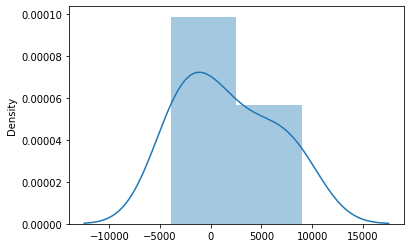

In [9]:
import seaborn as sns
sns.distplot(predictions-y_test)

Plotting the Best-fit Linear Regression Graph

Formula for the Linear Regression : Salary = B0 + B1*(Experience)
B0 = intercept => salary when experience is 0, B1 = slope => increase in salary with unit increase in salary

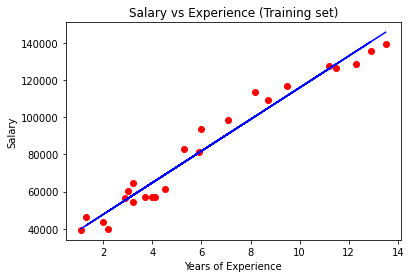

In [13]:
# Visualising the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
# plt.plot(X_train, model.predict(X_train))
plt.show()

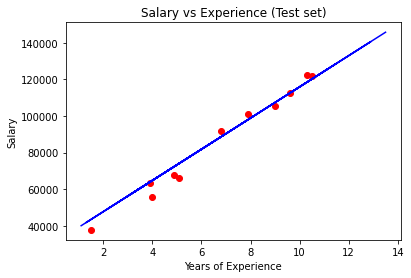

In [14]:
# Visualising the test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
# plt.plot(X_train, model.predict(X_train))
plt.show()

In [15]:
# predict the salary for 9 years
model.predict([[9]])

# in the result, the actual salary is 105582 - so this was a close prediction

array([107405.82255481])

In [16]:
# predict the salary for 5 years
model.predict([[5]])

# in the result the actual number for 5.1 years is 66029 so this was also a fairly close prediction

array([73293.81432684])